# importing the Library

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas import Series, DataFrame

import sklearn
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

import pylab as pl

# Training Dataset

In [18]:
# Importing Train Datset
train_data = pd.read_csv("Datasets/Credit_Risk_Train_Data.csv")
train_data = pd.DataFrame(train_data)
train_data.shape # Shape gives you total number of observations and variables present in datasets

(614, 13)

In [19]:
train_data.info() # Info gives you name of each variable with the data type associated with it.
train_data.head() # Head gives you first few rows of the dataset. (3 is the nummber of rows)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Testing Dataset

In [20]:
# Importing Test Datset
test_data = pd.read_csv("Datasets/Credit_Risk_Test_Data.csv")
test_data = pd.DataFrame(test_data)
test_data.shape

(367, 13)

In [21]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
outcome              367 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 37.4+ KB


In [22]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,outcome
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,N


In [23]:
#Finding the Null value of Training Dataset
train_data.isnull().sum() # Gives Variable wise NaN values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
train_data.isnull().sum().sum() #136 # Gives total number of NaN values in a dataset

149

In [27]:
#Finding the Null value in the Test
test_data.isnull().sum() 

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
outcome               0
dtype: int64

In [28]:
test_data.isnull().sum().sum() #84

84

# Training dataset

In [29]:
train_data.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [30]:
train_data.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [31]:
train_data.Dependents.value_counts()  # 3+

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [32]:
train_data.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [33]:
train_data.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [34]:
train_data.LoanAmount.value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [35]:
train_data.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [36]:
train_data.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [37]:
train_data.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [38]:
train_data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## Testing dataset

In [21]:
test_data.Gender.value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [22]:
test_data.Married.value_counts()

Yes    233
No     134
Name: Married, dtype: int64

In [39]:
test_data.Dependents.value_counts()  # 3+

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [40]:
test_data.Education.value_counts()

Graduate        283
Not Graduate     84
Name: Education, dtype: int64

In [41]:
test_data.Self_Employed.value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [42]:
train_data.LoanAmount.value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [43]:
test_data.Loan_Amount_Term.value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [44]:
test_data.Credit_History.value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [45]:
test_data.Property_Area.value_counts()

Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64

In [46]:
# Importing the LabelEncoder Libraries
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

## For Traning Dataset

In [48]:
train_data['Gender'] = number.fit_transform(train_data['Gender'].astype('str')) # This makes three levels 0,1, NaN = 2 
avgnum = np.round(np.mean(train_data['Gender'])) # So, we have to convert '2' into either 1 or 0 by taking the mean.
train_data['Gender'].replace(2,avgnum,inplace=True) # This replaces '2' with Rounded Avg Value

train_data['Married'] = number.fit_transform(train_data['Married'].astype('str'))
avgnum = np.round(np.mean(train_data['Married']))
train_data['Married'].replace(2,avgnum,inplace=True)

train_data['Dependents'] = number.fit_transform(train_data['Dependents'].astype('str')) # Creates 4 levels
train_data['Dependents'].replace(4,3,inplace=True) # The 4th level is converted into 3

train_data['Education'] = number.fit_transform(train_data['Education'].astype('str'))

train_data['Self_Employed'] = number.fit_transform(train_data['Self_Employed'].astype('str'))
avgnum = np.round(np.mean(train_data['Self_Employed']))
train_data['Self_Employed'].replace(2,avgnum,inplace=True)

avgnum = np.round(np.mean(train_data['Loan_Amount_Term'])) # It gives 342 which is closer to 360
train_data.Loan_Amount_Term.fillna(360 ,inplace = True) # So, filled NA values with 360

avgnum = np.round(np.mean(train_data['LoanAmount'])) # It gives 146 
train_data.LoanAmount.fillna(146 ,inplace = True) # So, filled NA values with 146

avgnum = np.round(np.mean(train_data['Credit_History'])) # It gives 1
train_data.Credit_History.fillna(1 ,inplace = True) # So, filled NA values with 1

train_data['Property_Area'] = number.fit_transform(train_data['Property_Area'].astype('str'))
train_data['Loan_Status'] = number.fit_transform(train_data['Loan_Status'].astype('str'))

In [32]:
train_data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1


In [49]:
train_data.isnull().sum() 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Testing Dataset

In [50]:
test_data['Gender'] = number.fit_transform(test_data['Gender'].astype('str'))  
avgnum = np.round(np.mean(test_data['Gender'])) 
test_data['Gender'].replace(2,avgnum,inplace=True) 

test_data['Married'] = number.fit_transform(test_data['Married'].astype('str'))
avgnum = np.round(np.mean(test_data['Married']))
test_data['Married'].replace(2,avgnum,inplace=True)

test_data['Dependents'] = number.fit_transform(test_data['Dependents'].astype('str')) # Creates 4 levels
test_data['Dependents'].replace(4,3,inplace=True) # The 4th level is converted into 3

test_data['Education'] = number.fit_transform(test_data['Education'].astype('str'))

test_data['Self_Employed'] = number.fit_transform(test_data['Self_Employed'].astype('str'))
avgnum = np.round(np.mean(test_data['Self_Employed']))
test_data['Self_Employed'].replace(2,avgnum,inplace=True)

avgnum = np.round(np.mean(test_data['Loan_Amount_Term'])) # It gives 343 which is closer to 360
test_data.Loan_Amount_Term.fillna(360 ,inplace = True) # So, filled NA values with 360

avgnum = np.round(np.mean(test_data['LoanAmount'])) # It gives 136 
test_data.LoanAmount.fillna(136 ,inplace = True) # So, filled NA values with 146

avgnum = np.round(np.mean(test_data['Credit_History'])) # It gives 1
test_data.Credit_History.fillna(1 ,inplace = True) # So, filled NA values with 1

test_data['Property_Area'] = number.fit_transform(test_data['Property_Area'].astype('str'))
test_data['outcome'] = number.fit_transform(test_data['outcome'].astype('str'))

In [51]:
test_data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,outcome
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,1
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,1
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,1


In [36]:
test_data.isnull().sum() 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
outcome              0
dtype: int64

# Plot and Graphs 

In [52]:
# Setting up the style and grid style of seaborn graphs
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
# palette=pkmn_type_colors

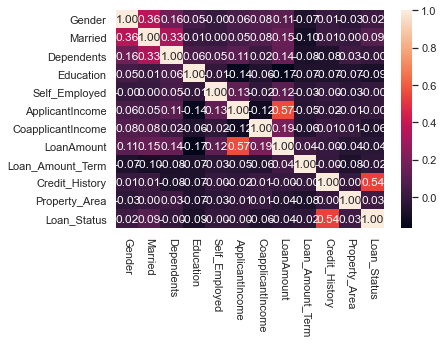

In [53]:
# Calculate correlations Using Heatmap
corr = train_data.corr()
sns.heatmap(corr, annot=True, fmt="0.2f"); # annot:write the data value in each cell | fmt:String formatting code d=decimal f=float  
plt.xticks(rotation=-90) # Heatmap
plt.show()

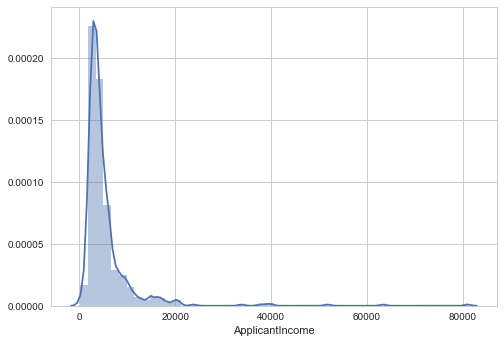

In [39]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(train_data.ApplicantIncome)
plt.show()

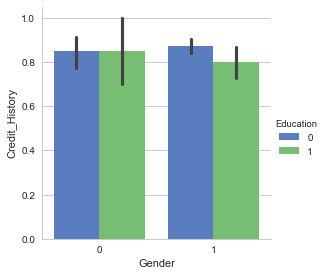

In [40]:
sns.factorplot("Gender", "Credit_History", "Education", data=train_data, kind="bar", palette="muted", legend=True)
plt.show()

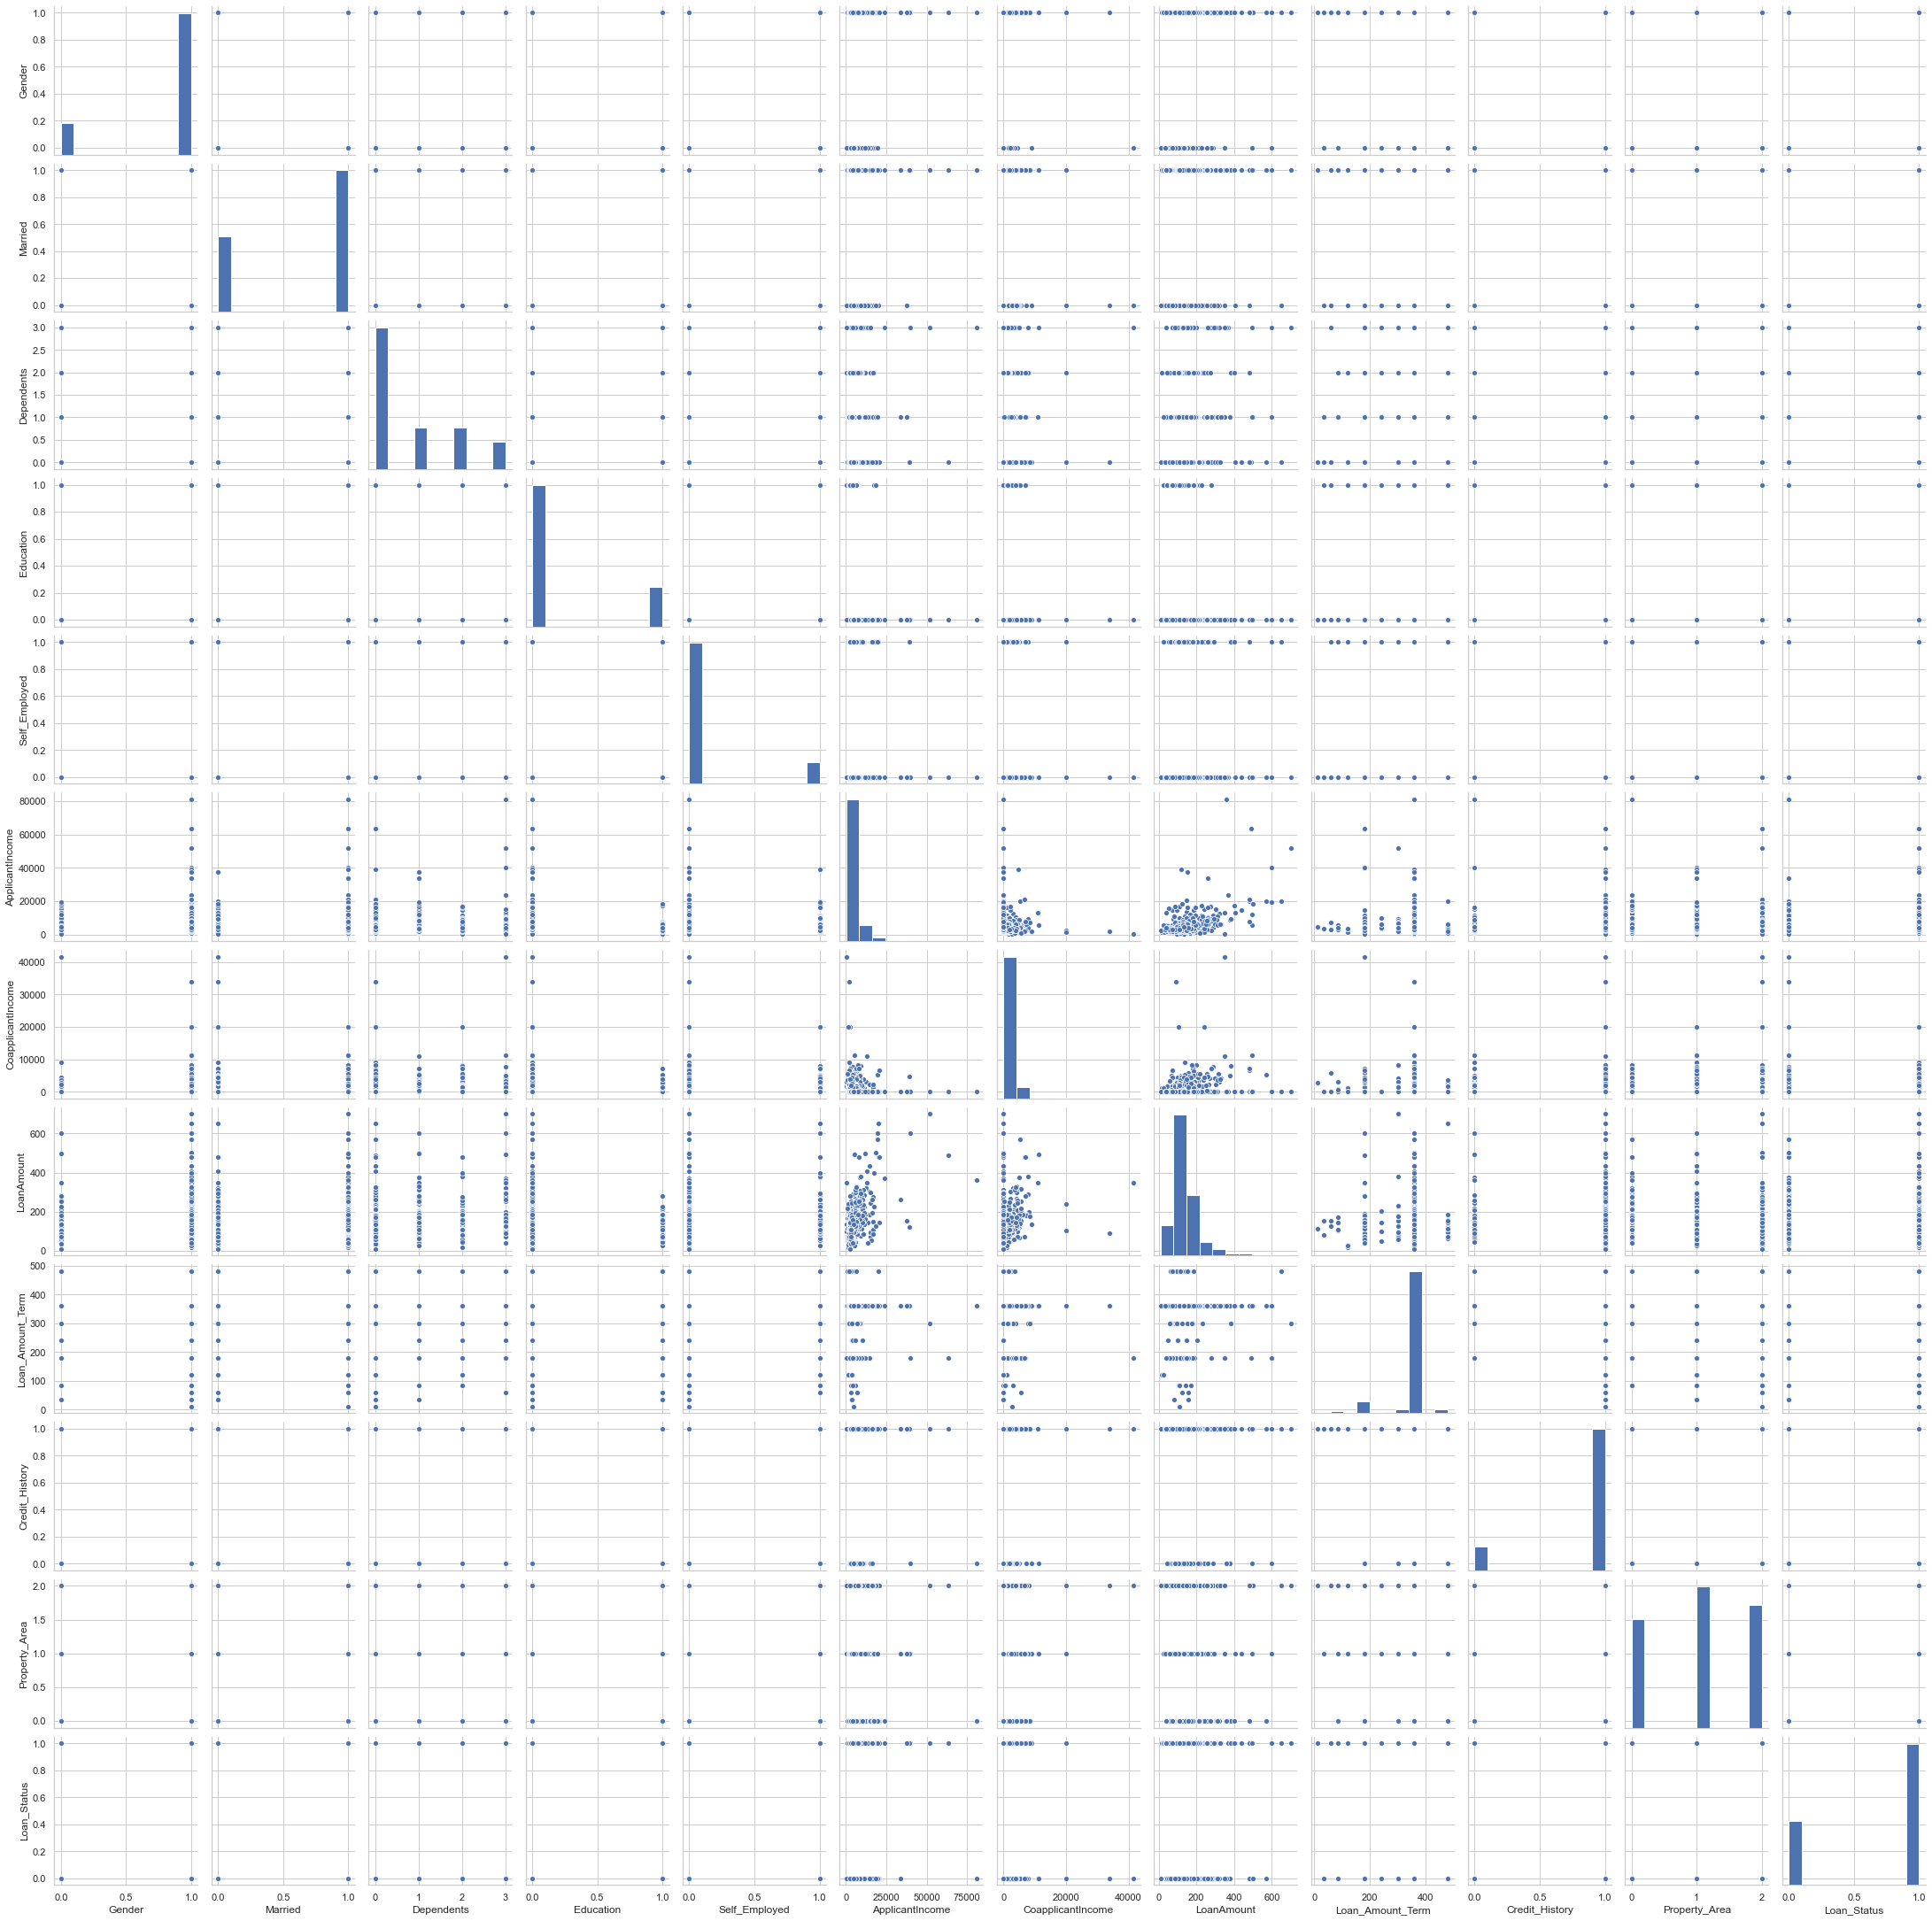

In [54]:
# Pair Plot
sns.pairplot(train_data)
plt.show()

## <span class="label label-default">Boxplot</span>

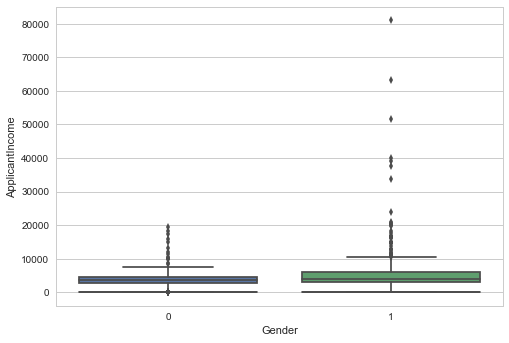

In [42]:
# Boxplot
sns.boxplot(data=train_data, palette="deep")
sns.boxplot(x='Gender' , y='ApplicantIncome', data=train_data, palette="deep")
plt.show()

## <span class="label label-default">Joint Distribution Plot</span>

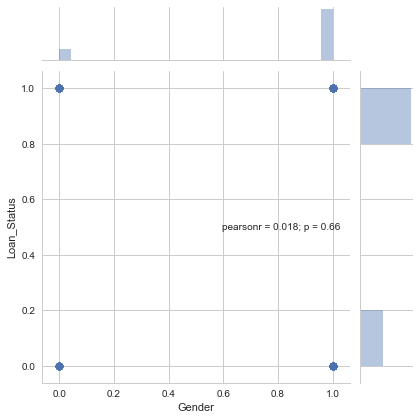

In [43]:
# Joint Distribution Plot
sns.jointplot(x='Gender', y='Loan_Status', data=train_data)
plt.show()


In [55]:
train_data_new = train_data.drop(['Loan_ID'], 1)
train_data_new.head(3) # 94.55% Accuracy | AUC = 92%

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1


In [56]:
# Validating Dataset
test_data_new = test_data.drop(['Loan_ID'], 1)
test_data_new.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,outcome
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,1
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,1
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,1


In [57]:
# Taking Train Dataset values in two variables
X_train = train_data_new.ix[:,(0,1,2,3,4,5,6,7,8,9,10)]
X_train.head(3)

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:961: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2


In [58]:
y_train = train_data_new.ix[:,11]
y_train.head(5)

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [48]:
# Taking Validate Dataset values as test data
# The purpose of doing this is : Test Data does not have a "Outcome" variable 
# So, the predicted values will be compared with "Outcome" variable of Validate Data
X_test = test_data_new.ix[:,(0,1,2,3,4,5,6,7,8,9,10)]
X_test.head()

C:\Users\satya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [49]:
y_test = test_data_new.ix[:,11]
y_test.head()

0    1
1    1
2    1
3    1
4    0
Name: outcome, dtype: int64

In [50]:
logit_model = sm.Logit(y_train, sm.add_constant(X_train)).fit()

Optimization terminated successfully.
         Current function value: 0.466576
         Iterations 6


In [51]:
logit_model.summary() # Gives the summary of model

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                          Logit   Df Residuals:                      602
Method:                           MLE   Df Model:                           11
Date:                Fri, 29 Dec 2017   Pseudo R-squ.:                  0.2490
Time:                        03:13:34   Log-Likelihood:                -286.48
converged:                       True   LL-Null:                       -381.45
                                        LLR p-value:                 9.059e-35
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.2485      0.818     -2.748      0.006      -3.852      -0.645
Gender               -0.0888      0.288     -0.308      0.758      -0.654       0.476
Married               0.5721      0.243      2.355      0.019       0.096       1.048
Dependents            0.0581      0.111      0.522      0.602      -0.160       0.276
Education            -0.4291      0.256     -1.677      0.094      -0.931       0.073
Self_Employed        -0.0102      0.310     -0.033      0.974      -0.619       0.598
ApplicantIncome    9.937e-06    2.3e-05      0.431      0.666   -3.52e-05    5.51e-05
CoapplicantIncome -5.136e-05   3.36e-05     -1.530      0.126      -0.000    1.44e-05
LoanAmount           -0.0021      0.002     -1.340      0.180      -0.005       0.001
Loan_Amount_Term     -0.0007      0.002     -0.412      0.681      -0.004       0.003
Credit_History        3.8553      0.414      9.312      0.000       3.044       4.667
Property_Area         0.0872      0.135      0.646      0.518      -0.177       0.352
=====================================================================================
"""

In [52]:
logit_model.conf_int() # gives you idea for how robust the coefficients of the model are

,0,1
const,-3.851879,-0.645025
Gender,-0.654031,0.476432
Married,0.095934,1.048294
Dependents,-0.159939,0.276053
Education,-0.930749,0.072531
Self_Employed,-0.618794,0.598336
ApplicantIncome,-0.000035,0.000055
CoapplicantIncome,-0.000117,0.000014
LoanAmount,-0.005160,0.000969
Loan_Amount_Term,-0.004168,0.002722


In [53]:
np.exp(logit_model.params) # odds ratios # the exponential of each of the coefficients to generate the odds ratios.
# All the odds ratio must be above 1, meaning that they are positively associated with <target_variable/dependent_variable>

const                 0.105563
Gender                0.915029
Married               1.772010
Dependents            1.059775
Education             0.651089
Self_Employed         0.989823
ApplicantIncome       1.000010
CoapplicantIncome     0.999949
LoanAmount            0.997907
Loan_Amount_Term      0.999277
Credit_History       47.240483
Property_Area         1.091085
dtype: float64

========================================================================================================================

In [54]:
train_data_new = train_data.drop(['Loan_ID', 'Gender','Dependents', 'Self_Employed', 'Education', 'Property_Area', 'ApplicantIncome', 'Loan_Amount_Term','CoapplicantIncome', 'LoanAmount' ], 1)
train_data_new.head(3) # 95% Accuracy | ROC = 91%

,Married,Credit_History,Loan_Status
0,0,1.0,1
1,1,1.0,0
2,1,1.0,1


In [55]:
test_data_new = test_data.drop(['Loan_ID', 'Gender','Dependents', 'Self_Employed', 'Education', 'Property_Area', 'ApplicantIncome', 'Loan_Amount_Term','CoapplicantIncome', 'LoanAmount' ], 1)
test_data_new.head(3)

,Married,Credit_History,outcome
0,1,1.0,1
1,1,1.0,1
2,1,1.0,1


In [56]:
# Taking Train Dataset values in two variables
X_train = train_data_new.ix[:,(0,1)]
X_train.head()

C:\Users\satya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,Married,Credit_History
0,0,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,0,1.0


In [57]:
y_train = train_data_new.ix[:,2]
y_train.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [58]:
# Taking Validate Dataset values as test data
# The purpose of doing this is : Test Data does not have a "Outcome" variable 
# So, the predicted values will be compared with "Outcome" variable of Validate Data
X_test = test_data_new.ix[:,(0,1)]
X_test.head()

C:\Users\satya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,Married,Credit_History
0,1,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,0,1.0


In [59]:
y_test = test_data_new.ix[:,2]
y_test.head()

0    1
1    1
2    1
3    1
4    0
Name: outcome, dtype: int64

In [60]:
logreg = LogisticRegression(fit_intercept=True,C = 1e15)
logreg.fit(X_train, y_train)
logreg.get_params()
logreg.decision_function(X_train)


array([ 0.99700476,  1.53029561,  1.53029561,  1.53029561,  0.99700476,
        1.53029561,  1.53029561, -2.29550214,  1.53029561,  1.53029561,
        1.53029561,  1.53029561,  1.53029561,  0.99700476,  1.53029561,
        0.99700476,  0.99700476, -2.82879299,  1.53029561,  1.53029561,
       -2.29550214,  1.53029561, -2.29550214, -2.29550214,  1.53029561,
        1.53029561,  1.53029561,  1.53029561,  0.99700476,  0.99700476,
        1.53029561,  0.99700476,  0.99700476,  1.53029561,  0.99700476,
        1.53029561, -2.29550214,  1.53029561,  0.99700476,  0.99700476,
        0.99700476,  0.99700476,  1.53029561,  1.53029561,  1.53029561,
        0.99700476,  1.53029561,  1.53029561, -2.29550214,  0.99700476,
        1.53029561,  0.99700476,  0.99700476,  1.53029561, -2.29550214,
        1.53029561,  1.53029561,  1.53029561,  1.53029561,  1.53029561,
        1.53029561,  1.53029561, -2.29550214, -2.29550214, -2.82879299,
        1.53029561, -2.82879299,  1.53029561,  1.53029561, -2.82

> ### Predicting the variable

In [61]:
# The y_pred = logreg.predict(X_test) will give output as a class prediction (0 and 1) 
# for every observstion in a testing set, which will store in y_pred class.
y_pred = logreg.predict(X_test)
y_pred


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1,

In [62]:
# Calculating R Sq.
sklearn.metrics.r2_score(y_test, y_pred)

0.67129422301836095

In [63]:
# classification Report using Scikit Learn
print(classification_report(y_test, y_pred))


             precision    recall  f1-score   support

          0       0.98      0.75      0.85        77
          1       0.94      1.00      0.97       290

avg / total       0.95      0.95      0.94       367



In [64]:
logreg.score(X_test, y_test) # Exact Accuracy


0.94550408719346046

In [65]:
logreg.coef_

array([[ 0.53329085,  3.82579775]])

In [66]:
logreg.intercept_

array([-2.82879299])

In [67]:
# Model Accuracy or The correct classification of model in %

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.945504087193


In [68]:
y_test.value_counts() # examine the class distribution of the testing set (using a Pandas Series method)

1    290
0     77
Name: outcome, dtype: int64

In [69]:
y_test.mean() # calculate the percentage of ones

0.7901907356948229

In [70]:
1 - y_test.mean() # calculate the percentage of zeros

0.2098092643051771

In [71]:
max(y_test.mean(), 1 - y_test.mean()) # calculates null accuracy (for binary classification problems coded as 0/1)

0.7901907356948229

In [72]:
y_test.value_counts().head(1) / len(y_test) # calculates null accuracy (for multi-class classification problems)

1    0.790191
Name: outcome, dtype: float64

In [73]:
y_test.value_counts()


1    290
0     77
Name: outcome, dtype: int64

In [74]:
np.bincount(y_pred) # Count the elements of an numpy array

array([ 59, 308], dtype=int64)

In [59]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_test, y_pred) 

NameError: name 'y_test' is not defined

In [76]:
# Let us see the first 10 true and predicted responses
print('True:', y_test.values[0:10])
print('Pred:', y_pred[0:10])
# Identify the four cases for the output generated.

True: [1 1 1 1 0 1 1 0 1 1]
Pred: [1 1 1 1 1 1 1 0 1 1]


In [77]:
# slice confusion matrix into four pieces and save it 
TP = confmat[1, 1]
TN = confmat[0, 0]
FP = confmat[0, 1]
FN = confmat[1, 0]

In [78]:
(TP + TN) / (TP + TN + FP + FN) 

0.94550408719346046

In [79]:
(FP + FN) / (TP + TN + FP + FN) 

0.054495912806539509

In [80]:
TP / (TP + FN)

0.99655172413793103

In [81]:
TN / (TN + FP) 

0.75324675324675328

In [82]:
FP / (TN + FP)

0.24675324675324675

In [83]:
TP / (TP + FP) 

0.93831168831168832

In [84]:
(2*TP) / ((2*TP) + FP + FN) 

0.96655518394648832

#### Using Metrics

In [85]:
print(metrics.accuracy_score(y_test, y_pred)) # Classification Accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # Classification Error
print(metrics.recall_score(y_test, y_pred)) # Sensitivity
print(metrics.precision_score(y_test, y_pred)) # Precision
# Specificity has no metric function in scikitlearn.

0.945504087193
0.0544959128065
0.996551724138
0.938311688312


#### Sensitivity and Specificity must be as high as possible. 
* In this model we can describe that our classifier is highly Sensitive and highly Specific

<a id="AdjClassThershold"></a>
<div class="alert alert-block alert-info" style="color:#000000">
# Adjusting the Classification Threshold

In [86]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [87]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[ 0.17795044,  0.82204956],
       [ 0.17795044,  0.82204956],
       [ 0.17795044,  0.82204956],
       [ 0.17795044,  0.82204956],
       [ 0.26953073,  0.73046927],
       [ 0.17795044,  0.82204956],
       [ 0.26953073,  0.73046927],
       [ 0.90850384,  0.09149616],
       [ 0.17795044,  0.82204956],
       [ 0.26953073,  0.73046927]])

* Each row represents observation and the coloumn represents class 0 and 1
* The sum of each row is 1
* By default the classification threshold is set to 0.5 
* So, out of 2 values in each row the value greater than or eaual to 0.5 is stored as '1'
* **The value less than 0.5 is stored as '0'**

In [88]:
print (logreg.predict_proba(X_test)[0:10, 1]) # print the first 10 predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1] # And store the predicted probabilities for class 1

[ 0.82204956  0.82204956  0.82204956  0.82204956  0.73046927  0.82204956
  0.73046927  0.09149616  0.82204956  0.73046927]


<a id="Histogram_of_pred_prob"></a>
### Histogram of predicted probabilities for class 1

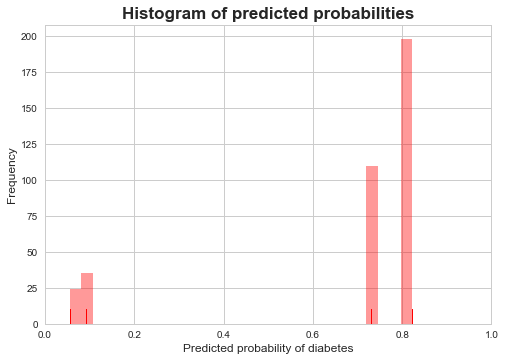

In [89]:
# If kernel density estimate (KDE) is set to TRUE then it shows density at y-axis
sns.distplot(y_pred_prob, color="red", kde=False, rug=True) # In this plot number of counts are shown at y-axis
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities', fontsize=17, fontweight='bold')
plt.xlabel('Predicted probability of diabetes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


* From this histogram we can see these probablities varies between **0 to 1**. And most of the points are above 0.6
* As we can clearly see that probability of ** 0.82 ** has the highst frequency  
* This states that majority of prediction (of class 1) occured are above 0.5 **[Default Threshold = 0.5]**
* If majority of prediction occured were below 0.5 then we might change our threshold value **(We can say class - 1 is rarely predicted)**
* ** But in this case we can say that class - 1 frequently predicted **

> * You can adjust Sensitivity and Specificity by setting threshold value
> * Sensitivity and specificity have an inverse relationship
> * Lower the cutoff higher will be the Sensitivity
> * Higher the cutoff higher will be the Specificity
> * So, depending on your business requirments you can increast or decrease thershold

 <a id="DecThreshold"></a>
 <div class="alert alert-block alert-info" style="color:#000000">
 ** =====================================================================================================================**
 ## Decreasing the threshold in order to increase the sensitivity of the classifier  
 ** [Optional for this Project] **

In [90]:
# predict loan outcome if the predicted probability is greater than 0.1
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.1)[0] # Its a 2D numpy array and we will slice only first dimension

y_pred_prob[0:10] # print the first 10 predicted probabilities
y_pred_class[0:10] # print the first 10 predicted classes with the lower threshold
print(confmat) # previous confusion matrix (default threshold of 0.5)
metrics.confusion_matrix(y_test, y_pred_class) # new confusion matrix (threshold of 0.1)

290 / (290 + 0) # sensitivity has increased to 1 (used to be 0.99655172)
24 / (24 + 53) # specificity has decreased to 0.31168831 (used to be 0.7532467)
# =================================================================================

[[ 58  19]
 [  1 289]]


0.3116883116883117

  <div class="alert alert-block alert-info" style="color:#000000">
 ** =====================================================================================================================**

<a id="rocauc"></a>
<div class="alert alert-block alert-info" style="color:#000000">
# ROC Curves and Area Under the Curve (AUC)

* It would be nice if we can see sensitivity and specificity are affected by various thresholds
* Without actually changing the threshold manually. (But if we change the threshold we have do the above process)
* We can do this by ROC curve. **[Receiver operating characteristic]**

In [91]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.auc(fpr, tpr) 
auc

0.90450067174205107

* Higher the AUC value better is the Classifier
* It is single number summary as a performance of classifier (alternative to accuract=y score)
* If you randomly chose one positive and one negative observation, AUC represents the 
* likelihood that your classifier will assign a higher predicted probability to the positive observation.

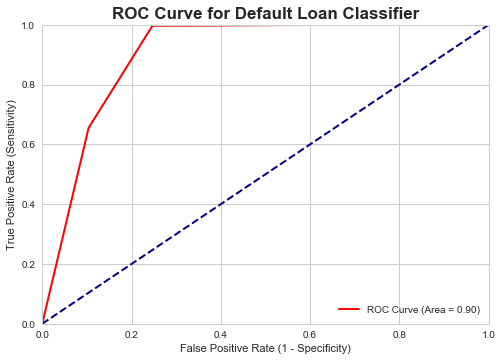

In [92]:
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve (Area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Default Loan Classifier', fontsize=17, fontweight='bold')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [93]:
print("False Positive Rates : ", fpr) # Increasing false positive rates
print("True Positive Rates : ",tpr) # Increasing true positive rates
print("Thresholds : ",thresholds) # Decreasing thresholds on the deecision 

False Positive Rates :  [ 0.          0.1038961   0.24675325  0.68831169  1.        ]
True Positive Rates :  [ 0.          0.65517241  0.99655172  1.          1.        ]
Thresholds :  [ 1.82204956  0.82204956  0.73046927  0.09149616  0.05578794]


* The curve tells you that if you want to achave Senssitive of 0.90 then 
* You have to accept the specificity of 0.20
* ROC curve can help you to visually choose a threshold that balances sensitivity and specificity
* But you can't actually see the thresholds used to generate the curve on the ROC curve itself

## <span class="label label-primary"> A function that accepts a threshold and prints sensitivity and specificity

* Refer to graph of [Histogram of Predicted robabilities](#Histogram_of_pred_prob) while studying the values of Sensitivity and Specificity.
* The graph is having 1-Specificity on the X-axis, which is converted to Specificity in the function.

In [94]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

This tells us that, when we set cutoff/threshold of 0.5 we get the **Sensitivity=0.99** and **Specificity: 0.75**

In [95]:
evaluate_threshold(0.5)

Sensitivity: 0.996551724138
Specificity: 0.753246753247


But when we set the cutoff to 0.01 we get the **Sensitivity=1** and **Specificity: 0**. This is because all the probabilities are above 0.01.

In [96]:
evaluate_threshold(0.01)

Sensitivity: 1.0
Specificity: 0.0


** So depending on your business requirment you have to adjust Sensitivity and Specificity **

In [97]:
test_data['Predicted Loan Status'] = y_pred 

In [ ]:
validate_data.head(10)

<a id="Conclusion"></a>
<div class="alert alert-block alert-info">
# Conclusion

** Confusion matrix advantages:**
* Allows you to calculate a variety of metrics
* Useful for multi-class problems (more than two response classes)


** ROC/AUC advantages:**
* Does not require you to set a classification threshold
* Still useful when there is high class imbalance
* However, multi-class problems it is difficult to identify threshold

[Top](#head)